In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset from a CSV file
file_path = 'IRIS.csv'  # Update with the actual path to your dataset
data = pd.read_csv(file_path)

# Ensure the dataset has the expected structure
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
label = 'Species'

# Split the dataset into features and target
X = data[features]
y = data[label]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=6, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both train and test data
y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model on train and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on Train Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy:.2f}")

# Classification Report for Test Data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

Accuracy on Train Data: 0.98
Accuracy on Test Data: 0.97
Classification Report (Test Data):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



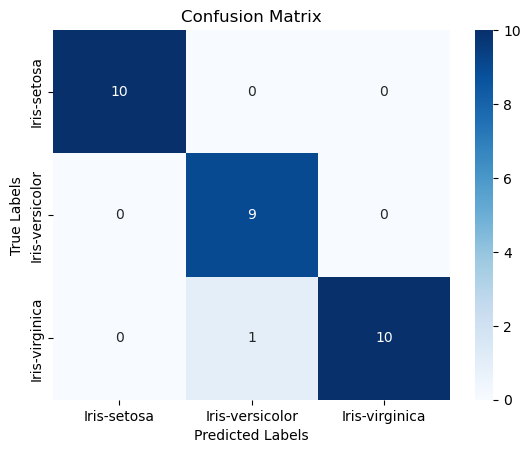


Feature Importance:
         Feature  Importance
2  PetalLengthCm    0.519269
3   PetalWidthCm    0.410485
0  SepalLengthCm    0.050789
1   SepalWidthCm    0.019457


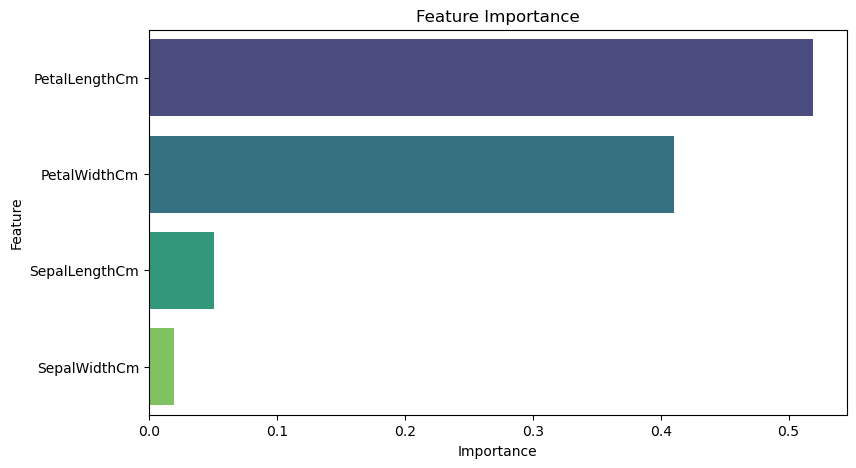

In [2]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Feature Importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plotting Feature Importance
plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()